<a href="https://colab.research.google.com/github/JanhaviSoni7/Deep-Learning-Projects/blob/main/Predicting_Patient_Vital_Signs_using_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [5/20], Loss: 0.0014
Epoch [10/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0047
Epoch [20/20], Loss: 0.0017


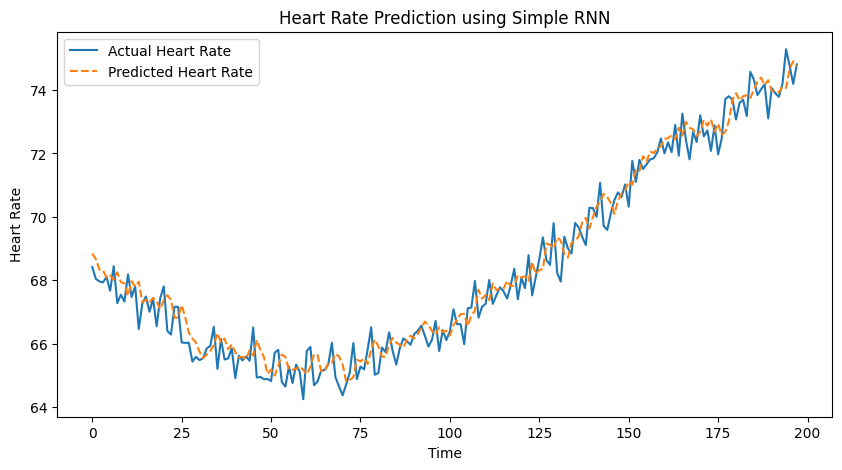

In [ ]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------
# Step 1: Generate Synthetic Heart Rate Data
# -------------------------------
np.random.seed(42)
time_steps = 1000

# Simulated heart rate data with a trend and noise
heart_rates = 70 + 5 * np.sin(0.02 * np.arange(time_steps)) + np.random.normal(0, 0.5, time_steps)

# Normalize the data (scale between 0 and 1)
scaler = MinMaxScaler()
heart_rates_scaled = scaler.fit_transform(heart_rates.reshape(-1, 1))

# Convert to PyTorch tensor
heart_rates_scaled = torch.tensor(heart_rates_scaled, dtype=torch.float32)

# -------------------------------
# Step 2: Create Time-Series Sequences
# -------------------------------
def create_sequences(data, seq_length=10):
    """Generate input-output pairs for time-series prediction."""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return torch.stack(X), torch.stack(y)

seq_length = 10  # Number of past timesteps used for prediction
X, y = create_sequences(heart_rates_scaled, seq_length)

# Split into training (80%) and testing (20%) datasets
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Convert to PyTorch DataLoader for batch processing
batch_size = 16
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# -------------------------------
# Step 3: Define the RNN Model
# -------------------------------
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)  # Initial hidden state
        out, _ = self.rnn(x, h0)  # Forward pass through RNN
        out = self.fc(out[:, -1, :])  # Take output of the last time step
        return out

# Instantiate the model
model = SimpleRNN()

# -------------------------------
# Step 4: Define Loss Function and Optimizer
# -------------------------------
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

# -------------------------------
# Step 5: Train the Model
# -------------------------------
num_epochs = 20

for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        batch_X = batch_X.view(batch_X.size(0), seq_length, 1)  # Reshape for RNN
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# -------------------------------
# Step 6: Evaluate Model Performance
# -------------------------------
model.eval()  # Set model to evaluation mode
predictions, actuals = [], []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.view(batch_X.size(0), seq_length, 1)
        preds = model(batch_X)
        predictions.extend(preds.numpy().flatten())  # Convert tensor to list
        actuals.extend(batch_y.numpy().flatten())

# Rescale predictions back to original heart rate values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))

# -------------------------------
# Step 7: Visualize Results
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(actuals, label="Actual Heart Rate")
plt.plot(predictions, label="Predicted Heart Rate", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()
plt.title("Heart Rate Prediction using Simple RNN")
plt.show()


In [ ]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade torchdata
!pip install --upgrade torchtext

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install torch==2.1.0 torchtext==0.16.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
!pip install torchtext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip uninstall torchtext torch -y


Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124


In [ ]:
!pip install torch==2.0.1 torchtext==0.15.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

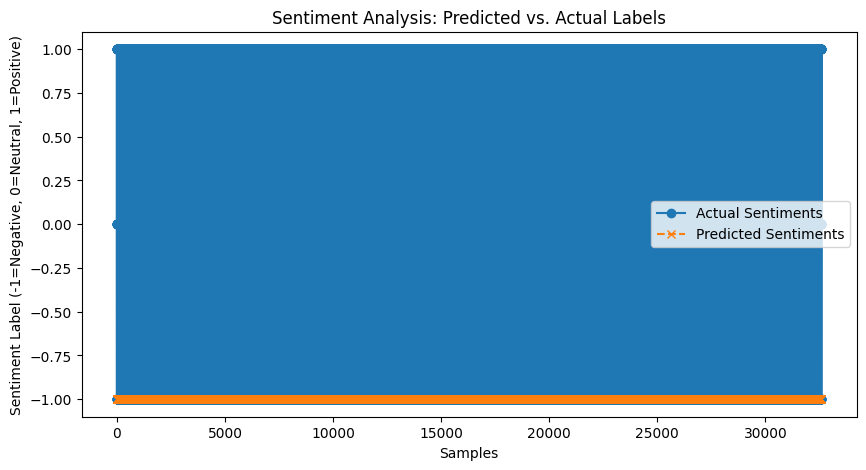

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("twitter_sentiment.csv")
df.dropna(inplace=True)
df["label"] = df["label"].astype(int)  # Convert labels to integers

# Tokenization
tokenizer = get_tokenizer("basic_english")
df["tokens"] = df["text"].apply(tokenizer)

# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load GloVe embeddings
glove = GloVe(name="6B", dim=100)
unk_idx = len(glove.stoi)  # Index for unknown words

def text_to_indices(tokens):
    return [glove.stoi.get(t, unk_idx) for t in tokens]

# Apply token-to-index conversion
train_data = train_data.copy()
test_data = test_data.copy()
train_data["indices"] = train_data["tokens"].apply(text_to_indices)
test_data["indices"] = test_data["tokens"].apply(text_to_indices)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, data, max_len=50):
        self.data = data
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        indices = self.data.iloc[index]["indices"]
        label = self.data.iloc[index]["label"]
        indices = indices[:self.max_len] + [0] * max(0, self.max_len - len(indices))
        return torch.tensor(indices, dtype=torch.long), torch.tensor(label + 1, dtype=torch.long)  # Shift labels (-1,0,1) to (0,1,2)

# DataLoaders
train_loader = DataLoader(TweetDataset(train_data), batch_size=32, shuffle=True)
test_loader = DataLoader(TweetDataset(test_data), batch_size=32, shuffle=False)

# Sentiment Analysis Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.cat([glove.vectors, torch.zeros(1, 100)]), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# Instantiate Model
vocab_size = len(glove.stoi) + 1  # Include extra index for <unk>
model = SentimentLSTM(vocab_size)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate Model and Visualize Results
def evaluate_and_visualize():
    model.eval()
    actuals, predictions = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1)
            actuals.extend(batch_y.tolist())
            predictions.extend(preds.tolist())

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label="Actual Sentiments", marker='o')
    plt.plot(predictions, label="Predicted Sentiments", linestyle="dashed", marker='x')
    plt.xlabel("Samples")
    plt.ylabel("Sentiment Label (-1=Negative, 0=Neutral, 1=Positive)")
    plt.legend()
    plt.title("Sentiment Analysis: Predicted vs. Actual Labels")
    plt.show()

evaluate_and_visualize()

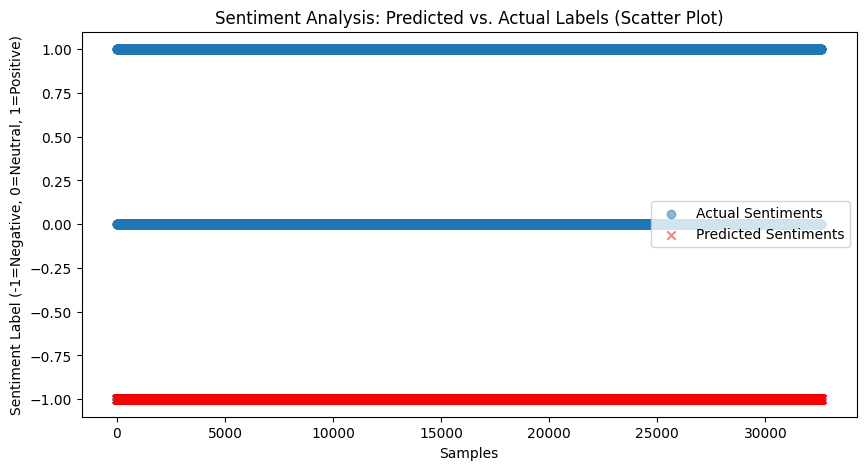

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("twitter_sentiment.csv")
df.dropna(inplace=True)
df["label"] = df["label"].astype(int)  # Convert labels to integers

# Tokenization
tokenizer = get_tokenizer("basic_english")
df["tokens"] = df["text"].apply(tokenizer)

# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load GloVe embeddings
glove = GloVe(name="6B", dim=100)
unk_idx = len(glove.stoi)  # Index for unknown words

def text_to_indices(tokens):
    return [glove.stoi.get(t, unk_idx) for t in tokens]

# Apply token-to-index conversion
train_data = train_data.copy()
test_data = test_data.copy()
train_data["indices"] = train_data["tokens"].apply(text_to_indices)
test_data["indices"] = test_data["tokens"].apply(text_to_indices)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, data, max_len=50):
        self.data = data
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        indices = self.data.iloc[index]["indices"]
        label = self.data.iloc[index]["label"]
        indices = indices[:self.max_len] + [0] * max(0, self.max_len - len(indices))
        return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)  # Keep labels as (-1,0,1)

# DataLoaders
train_loader = DataLoader(TweetDataset(train_data), batch_size=32, shuffle=True)
test_loader = DataLoader(TweetDataset(test_data), batch_size=32, shuffle=False)

# Sentiment Analysis Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.cat([glove.vectors, torch.zeros(1, 100)]), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Use log_softmax for compatibility with NLLLoss

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.log_softmax(self.fc(lstm_out[:, -1, :]))

# Instantiate Model
vocab_size = len(glove.stoi) + 1  # Include extra index for <unk>
model = SentimentLSTM(vocab_size)

# Define Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate Model and Visualize Results
def evaluate_and_visualize():
    model.eval()
    actuals, predictions = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1) - 1  # Adjust predictions back to (-1,0,1)
            actuals.extend(batch_y.tolist())
            predictions.extend(preds.tolist())

    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(actuals)), actuals, label="Actual Sentiments", marker='o', alpha=0.5)
    plt.scatter(range(len(predictions)), predictions, label="Predicted Sentiments", marker='x', alpha=0.5, color='red')
    plt.xlabel("Samples")
    plt.ylabel("Sentiment Label (-1=Negative, 0=Neutral, 1=Positive)")
    plt.legend()
    plt.title("Sentiment Analysis: Predicted vs. Actual Labels (Scatter Plot)")
    plt.show()

evaluate_and_visualize()


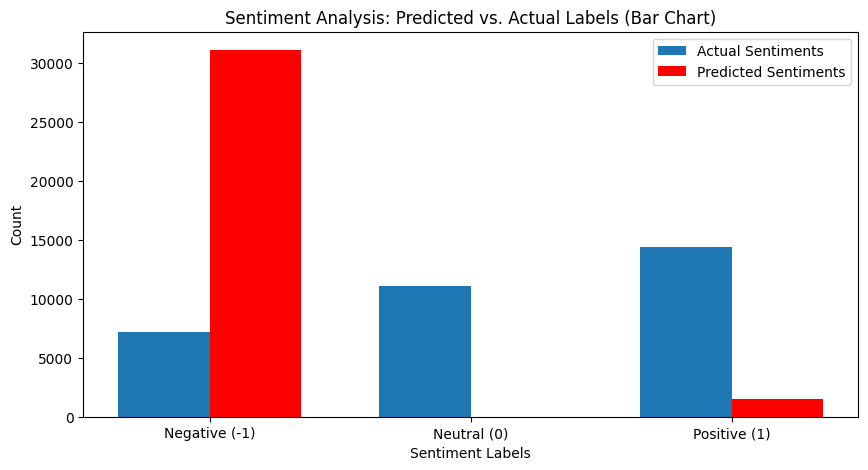

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("twitter_sentiment.csv")
df.dropna(inplace=True)
df["label"] = df["label"].astype(int)  # Convert labels to integers

# Tokenization
tokenizer = get_tokenizer("basic_english")
df["tokens"] = df["text"].apply(tokenizer)

# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load GloVe embeddings
glove = GloVe(name="6B", dim=100)
unk_idx = len(glove.stoi)  # Index for unknown words

def text_to_indices(tokens):
    return [glove.stoi.get(t, unk_idx) for t in tokens]

# Apply token-to-index conversion
train_data = train_data.copy()
test_data = test_data.copy()
train_data["indices"] = train_data["tokens"].apply(text_to_indices)
test_data["indices"] = test_data["tokens"].apply(text_to_indices)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, data, max_len=50):
        self.data = data
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        indices = self.data.iloc[index]["indices"]
        label = self.data.iloc[index]["label"]
        indices = indices[:self.max_len] + [0] * max(0, self.max_len - len(indices))
        return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)  # Keep labels as (-1,0,1)

# DataLoaders
train_loader = DataLoader(TweetDataset(train_data), batch_size=32, shuffle=True)
test_loader = DataLoader(TweetDataset(test_data), batch_size=32, shuffle=False)

# Sentiment Analysis Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.cat([glove.vectors, torch.zeros(1, 100)]), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Use log_softmax for compatibility with NLLLoss

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.log_softmax(self.fc(lstm_out[:, -1, :]))

# Instantiate Model
vocab_size = len(glove.stoi) + 1  # Include extra index for <unk>
model = SentimentLSTM(vocab_size)

# Define Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate Model and Visualize Results
def evaluate_and_visualize():
    model.eval()
    actuals, predictions = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1) - 1  # Adjust predictions back to (-1,0,1)
            actuals.extend(batch_y.tolist())
            predictions.extend(preds.tolist())

    labels = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
    actual_counts = [actuals.count(-1), actuals.count(0), actuals.count(1)]
    predicted_counts = [predictions.count(-1), predictions.count(0), predictions.count(1)]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, actual_counts, width, label='Actual Sentiments')
    plt.bar(x + width/2, predicted_counts, width, label='Predicted Sentiments', color='red')

    plt.xlabel("Sentiment Labels")
    plt.ylabel("Count")
    plt.xticks(x, labels)
    plt.legend()
    plt.title("Sentiment Analysis: Predicted vs. Actual Labels (Bar Chart)")
    plt.show()

evaluate_and_visualize()


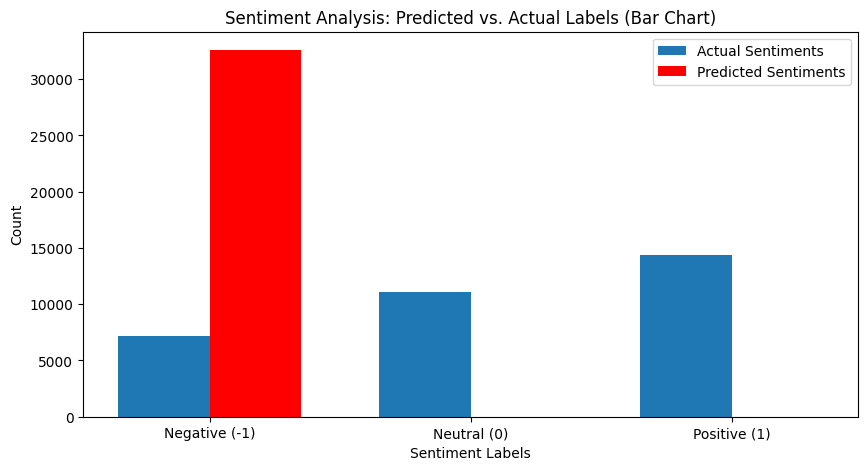

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("twitter_sentiment.csv")
df.dropna(inplace=True)
df["label"] = df["label"].astype(int)  # Convert labels to integers

# Tokenization
tokenizer = get_tokenizer("basic_english")
df["tokens"] = df["text"].apply(tokenizer)

# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load GloVe embeddings
glove = GloVe(name="6B", dim=100)
unk_idx = len(glove.stoi)  # Index for unknown words

def text_to_indices(tokens):
    return [glove.stoi.get(t, unk_idx) for t in tokens]

# Apply token-to-index conversion
train_data = train_data.copy()
test_data = test_data.copy()
train_data["indices"] = train_data["tokens"].apply(text_to_indices)
test_data["indices"] = test_data["tokens"].apply(text_to_indices)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, data, max_len=50):
        self.data = data
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        indices = self.data.iloc[index]["indices"]
        label = self.data.iloc[index]["label"]
        indices = indices[:self.max_len] + [0] * max(0, self.max_len - len(indices))
        return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)  # Keep labels as (-1,0,1)

# DataLoaders
train_loader = DataLoader(TweetDataset(train_data), batch_size=32, shuffle=True)
test_loader = DataLoader(TweetDataset(test_data), batch_size=32, shuffle=False)

# Sentiment Analysis Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.cat([glove.vectors, torch.zeros(1, 100)]), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Use log_softmax for compatibility with NLLLoss

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.log_softmax(self.fc(lstm_out[:, -1, :]))

# Instantiate Model
vocab_size = len(glove.stoi) + 1  # Include extra index for <unk>
model = SentimentLSTM(vocab_size)

# Define Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate Model and Visualize Results
def evaluate_and_visualize():
    model.eval()
    actuals, predictions = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1) - 1  # Adjust predictions back to (-1,0,1)
            actuals.extend(batch_y.tolist())
            predictions.extend(preds.tolist())

    labels = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
    actual_counts = [actuals.count(-1), actuals.count(0), actuals.count(1)]
    predicted_counts = [predictions.count(-1), predictions.count(0), predictions.count(1)]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, actual_counts, width, label='Actual Sentiments')
    plt.bar(x + width/2, predicted_counts, width, label='Predicted Sentiments', color='red')

    plt.xlabel("Sentiment Labels")
    plt.ylabel("Count")
    plt.xticks(x, labels)
    plt.legend()
    plt.title("Sentiment Analysis: Predicted vs. Actual Labels (Bar Chart)")
    plt.show()

evaluate_and_visualize()


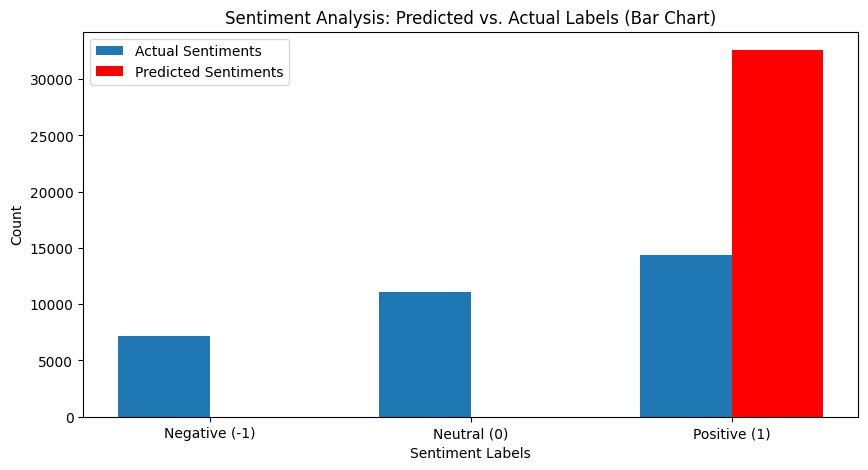

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
from torchtext.vocab import GloVe
from torchtext.data.utils import get_tokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("twitter_sentiment.csv")
df.dropna(inplace=True)
df["label"] = df["label"].astype(int)  # Convert labels to integers

# Tokenization
tokenizer = get_tokenizer("basic_english")
df["tokens"] = df["text"].apply(tokenizer)

# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Load GloVe embeddings
glove = GloVe(name="6B", dim=100)
unk_idx = len(glove.stoi)  # Index for unknown words

def text_to_indices(tokens):
    return [glove.stoi.get(t, unk_idx) for t in tokens]

# Apply token-to-index conversion
train_data = train_data.copy()
test_data = test_data.copy()
train_data["indices"] = train_data["tokens"].apply(text_to_indices)
test_data["indices"] = test_data["tokens"].apply(text_to_indices)

# Dataset class
class TweetDataset(Dataset):
    def __init__(self, data, max_len=50):
        self.data = data
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        indices = self.data.iloc[index]["indices"]
        label = self.data.iloc[index]["label"]
        indices = indices[:self.max_len] + [0] * max(0, self.max_len - len(indices))
        return torch.tensor(indices, dtype=torch.long), torch.tensor(label, dtype=torch.long)  # Keep labels as (-1,0,1)

# DataLoaders
train_loader = DataLoader(TweetDataset(train_data), batch_size=32, shuffle=True)
test_loader = DataLoader(TweetDataset(test_data), batch_size=32, shuffle=False)

# Sentiment Analysis Model
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, num_layers=2, output_dim=3):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.cat([glove.vectors, torch.zeros(1, 100)]), freeze=False)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Use log_softmax for compatibility with NLLLoss

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.log_softmax(self.fc(lstm_out[:, -1, :]))

# Instantiate Model
vocab_size = len(glove.stoi) + 1  # Include extra index for <unk>
model = SentimentLSTM(vocab_size)

# Define Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluate Model and Visualize Results
def evaluate_and_visualize():
    model.eval()
    actuals, predictions = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1) - 1  # Adjust predictions back to (-1,0,1)
            actuals.extend(batch_y.tolist())
            predictions.extend(preds.tolist())

    labels = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
    actual_counts = [actuals.count(-1), actuals.count(0), actuals.count(1)]
    predicted_counts = [predictions.count(-1), predictions.count(0), predictions.count(1)]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, actual_counts, width, label='Actual Sentiments')
    plt.bar(x + width/2, predicted_counts, width, label='Predicted Sentiments', color='red')

    plt.xlabel("Sentiment Labels")
    plt.ylabel("Count")
    plt.xticks(x, labels)
    plt.legend()
    plt.title("Sentiment Analysis: Predicted vs. Actual Labels (Bar Chart)")
    plt.show()

evaluate_and_visualize()
